# Necessary Imports & Setups

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Ellipse

In [2]:
# Import all neccseary strains
strain_yymxx = pd.read_csv("/home/luca/Desktop/Research/Rooney Paper Sim/Au Gate Result 1/strain_yy-xx data.csv")
strain_xz = pd.read_csv("/home/luca/Desktop/Research/Rooney Paper Sim/Au Gate Result 1/strain_xz data.csv")
strain_yz = pd.read_csv("/home/luca/Desktop/Research/Rooney Paper Sim/Au Gate Result 1/strain_yz data.csv")
strain_xy = pd.read_csv("/home/luca/Desktop/Research/Rooney Paper Sim/Au Gate Result 1/strain_xy data.csv")

In [3]:
# Write constants for calculating the g-factor correction
b = -2.160
k = 3.410
delta_LH = 71 * 10**(-3) # eV
d = -6.060

# G-factor calculation and plotting

In [4]:
# Define the function to calculate the g_xx or g_yy correction
def g_xx_func(eps_yymxx):
    g_xx = (6 * b * k * eps_yymxx)/delta_LH
    return g_xx

# Create a new DataFrame for g_xx values and coordinates
g_xx_data = pd.DataFrame({
    'x': strain_yymxx['x'],
    'y': strain_yymxx['y'],
    'g_xx': g_xx_func(strain_yymxx['strain_value'])
})

# Create a new DataFrame for g_yy values and coordinates
g_yy_data = pd.DataFrame({
    'x': strain_yymxx['x'],
    'y': strain_yymxx['y'],
    'g_yy': g_xx_func(strain_yymxx['strain_value'])
})

In [5]:
# Define the function to calculate the g_xx correction
def g_zx_func(eps_xz):
    g_zx = (-4*np.sqrt(3) * d * k * eps_xz)/delta_LH
    return g_zx

# Create a new DataFrame for g_zx values and coordinates
g_zx_data = pd.DataFrame({
    'x': strain_xz['x'],
    'y': strain_xz['y'],
    'g_zx': g_zx_func(strain_xz['strain_value'])
})

In [6]:
# Define the function to calculate the g_xx correction
def g_zy_func(eps_yz):
    g_zy = (-4*np.sqrt(3) * d * k * eps_yz)/delta_LH
    return g_zy

# Create a new DataFrame for g_zy values and coordinates
g_zy_data = pd.DataFrame({
    'x': strain_yz['x'],
    'y': strain_yz['y'],
    'g_zy': g_zy_func(strain_yz['strain_value'])
})

In [7]:
# Define the function to calculate the g_xy correction
def g_xy_func(eps_xy):
    g_xy = (-4*np.sqrt(3) * d * k * eps_xy)/delta_LH
    return g_xy

# Create a new DataFrame for g_zy values and coordinates
g_xy_data = pd.DataFrame({
    'x': strain_yz['x'],
    'y': strain_yz['y'],
    'g_xy': g_xy_func(strain_xy['strain_value'])
})

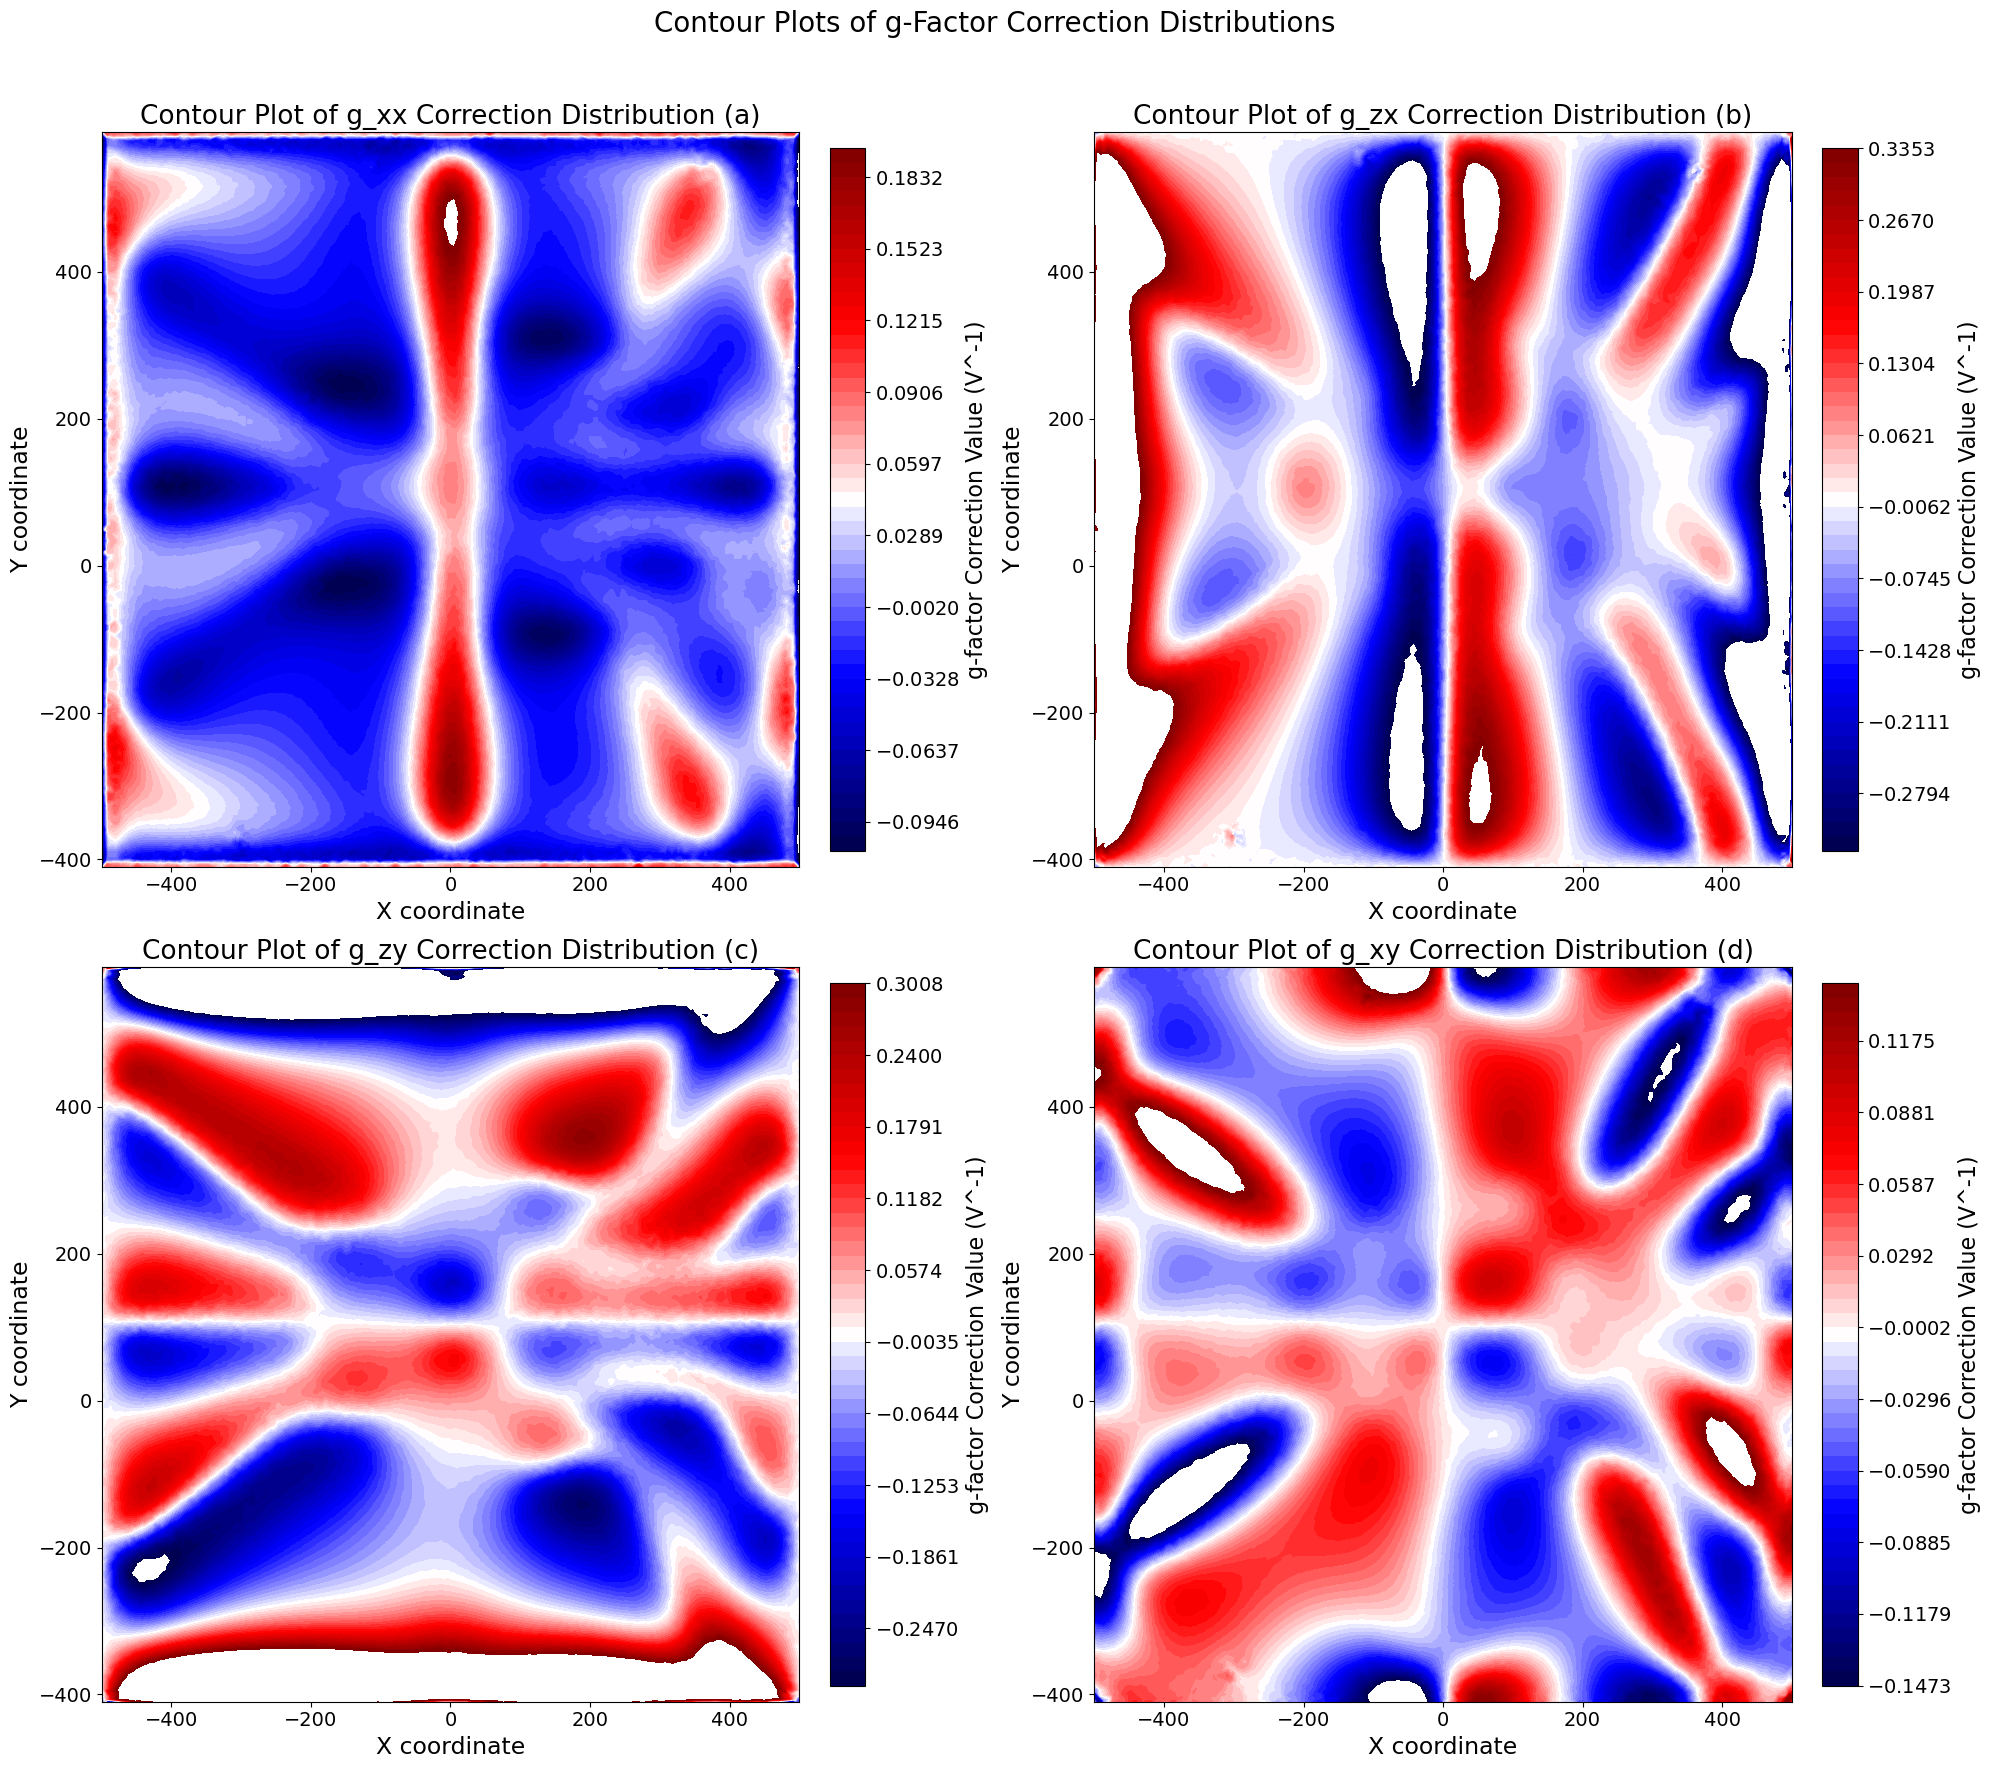

In [11]:
# Define a function to format the colorbar
def format_colorbar(cbar):
    cbar.set_label('g-factor Correction Value (V^-1)', fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    formatter = ScalarFormatter(useMathText=True)
    #formatter.set_scientific(True)
    #formatter.set_powerlimits((-2, 2))
    cbar.ax.yaxis.set_major_formatter(formatter)

# Create a grid for x and y coordinates
# Extract unique x and y coordinates
x_unique = np.sort(strain_xz['x'].unique())
y_unique = np.sort(strain_xz['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

fig, axs = plt.subplots(2, 2, figsize=(20, 18))
fig.suptitle('Contour Plots of g-Factor Correction Distributions', fontsize=20)

# Plot 1: g_xx Correction Distribution
g_xx_data_sorted = g_xx_data.sort_values(by=['y', 'x'])
Z = g_xx_data_sorted['g_xx'].values.reshape(X.shape)
start_value = np.percentile(Z, 0.1)
end_value = np.percentile(Z, 99.9)
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 0].set_title('Contour Plot of g_xx Correction Distribution (a)', fontsize=19)
axs[0, 0].set_xlabel('X coordinate', fontsize=17)
axs[0, 0].set_ylabel('Y coordinate', fontsize=17)
axs[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 2: g_zx Correction Distribution
g_zx_data_sorted = g_zx_data.sort_values(by=['y', 'x'])
Z = g_zx_data_sorted['g_zx'].values.reshape(X.shape)
start_value = np.percentile(Z, 7)
end_value = np.percentile(Z, 93)
levels = np.linspace(start_value, end_value, 50)
contour = axs[0, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[0, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[0, 1].set_title('Contour Plot of g_zx Correction Distribution (b)', fontsize=19)
axs[0, 1].set_xlabel('X coordinate', fontsize=17)
axs[0, 1].set_ylabel('Y coordinate', fontsize=17)
axs[0, 1].tick_params(axis='both', which='major', labelsize=14)

# Plot 3: g_zy Correction Distribution
g_zy_data_sorted = g_zy_data.sort_values(by=['y', 'x'])
Z = g_zy_data_sorted['g_zy'].values.reshape(X.shape)
start_value = np.percentile(Z, 6)
end_value = np.percentile(Z, 94)
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 0].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 0], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 0].set_title('Contour Plot of g_zy Correction Distribution (c)', fontsize=19)
axs[1, 0].set_xlabel('X coordinate', fontsize=17)
axs[1, 0].set_ylabel('Y coordinate', fontsize=17)
axs[1, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot 4: g_xy Correction Distribution
g_xy_data_sorted = g_xy_data.sort_values(by=['y', 'x'])
Z = g_xy_data_sorted['g_xy'].values.reshape(X.shape)
start_value = np.percentile(Z, 1.5)
end_value = np.percentile(Z, 98.5)
levels = np.linspace(start_value, end_value, 50)
contour = axs[1, 1].contourf(X, Y, Z, levels=levels, cmap='seismic')
cbar = fig.colorbar(contour, ax=axs[1, 1], fraction=0.046, pad=0.04)
format_colorbar(cbar)
axs[1, 1].set_title('Contour Plot of g_xy Correction Distribution (d)', fontsize=19)
axs[1, 1].set_xlabel('X coordinate', fontsize=17)
axs[1, 1].set_ylabel('Y coordinate', fontsize=17)
axs[1, 1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate average g-factor in an ellipse

In [12]:
# Define the ellipse region filter
# Parameters for the ellipse
ellipse_center = (95, 208.9)  # Center of the ellipse
ellipse_width = 50
ellipse_height = 60
ellipse_angle = 0

# Define the mask for the ellipse
mask = ((X - ellipse_center[0])**2 / ellipse_width**2 + (Y - ellipse_center[1])**2 / ellipse_height**2) <= 1

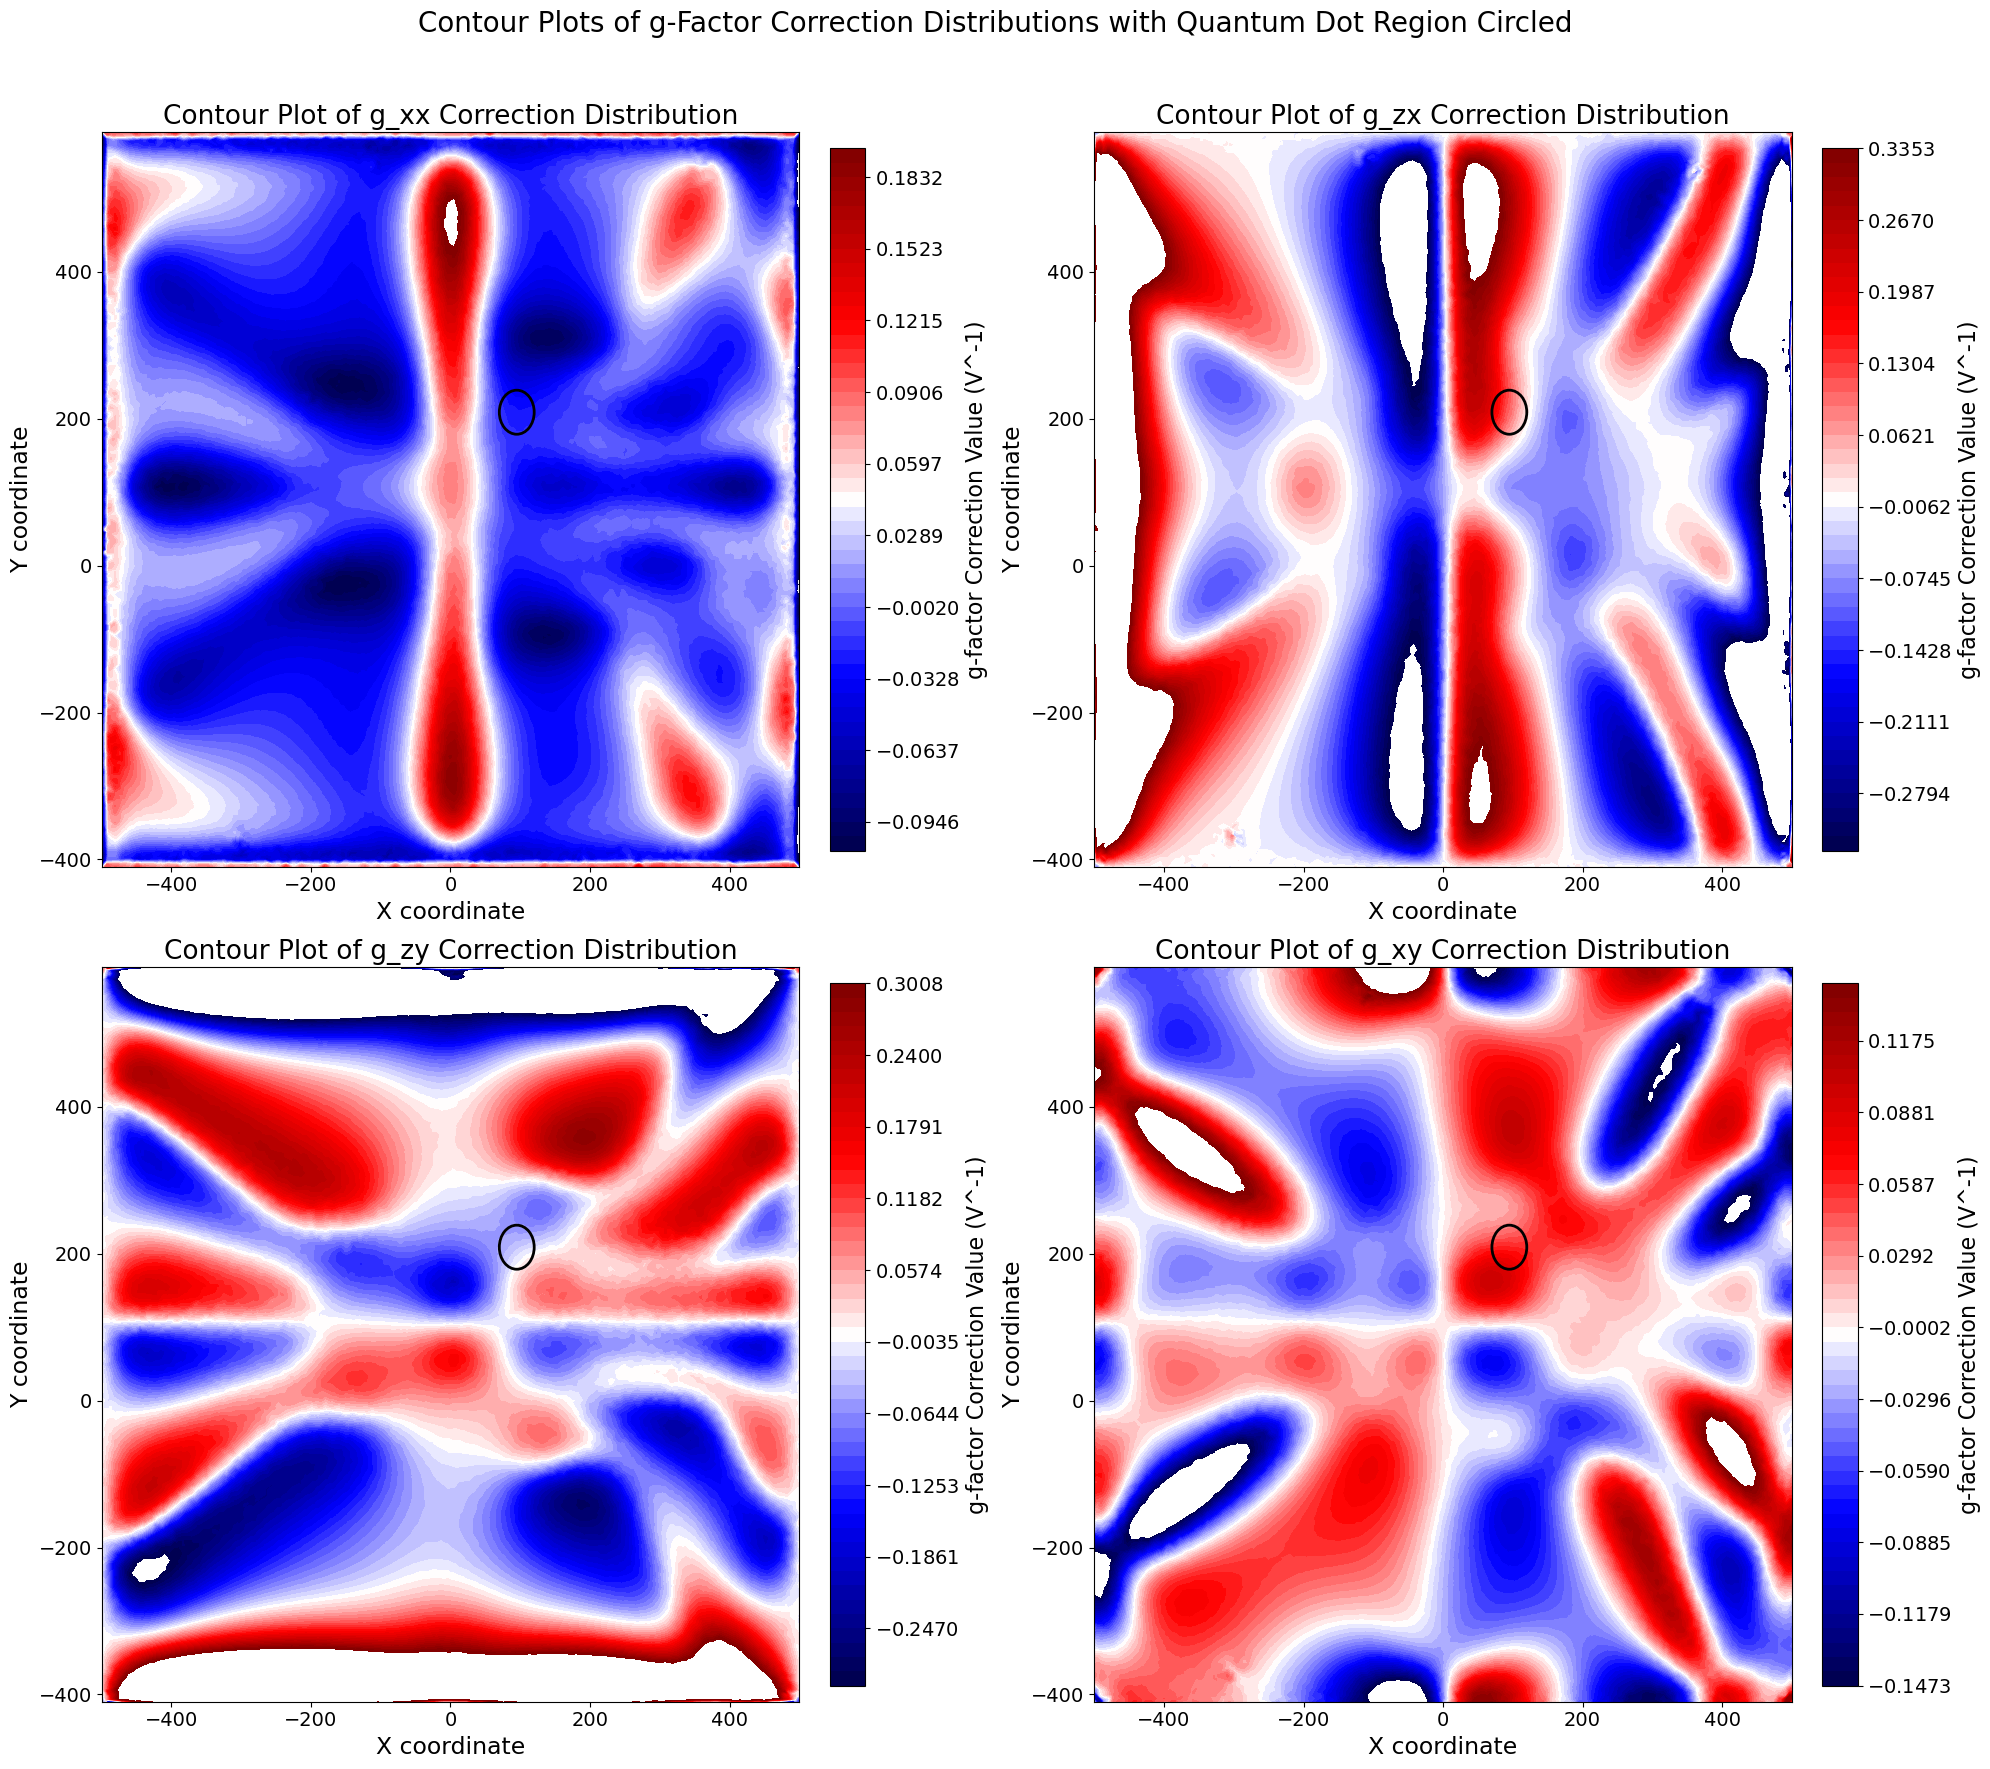

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
fig.suptitle('Contour Plots of g-Factor Correction Distributions with Quantum Dot Region Circled', fontsize=20)

# Specific percentile settings for each subplot
percentile_settings = [(0.1, 99.9), (7, 93), (6, 94), (1.5, 98.5)]

# Dataset names and sorting, assumed to be done elsewhere in the code
data_names = ['g_xx', 'g_zx', 'g_zy', 'g_xy']
data_sorted_list = [g_xx_data, g_zx_data, g_zy_data, g_xy_data]

for i, ax in enumerate(axs.flat):
    # Sort and reshape data
    data_sorted = data_sorted_list[i].sort_values(by=['y', 'x'])
    Z = data_sorted[data_names[i]].values.reshape(X.shape)

    # Determine levels based on percentiles
    start_value = np.percentile(Z, percentile_settings[i][0])
    end_value = np.percentile(Z, percentile_settings[i][1])
    levels = np.linspace(start_value, end_value, 50)

    # Create contour plot
    contour = ax.contourf(X, Y, Z, levels=levels, cmap='seismic')
    cbar = fig.colorbar(contour, ax=ax, fraction=0.046, pad=0.04)
    format_colorbar(cbar)
    ax.set_title(f'Contour Plot of {data_names[i]} Correction Distribution', fontsize=19)
    ax.set_xlabel('X coordinate', fontsize=17)
    ax.set_ylabel('Y coordinate', fontsize=17)
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Add the ellipse
    ellipse = Ellipse(xy=ellipse_center, width=ellipse_width, height=ellipse_height, angle=ellipse_angle, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Average G-factor inside Ellipse

In [15]:
# Define the function to check if the point is inside the ellipse
def point_in_ellipse(x, y, x0, y0, a, b, angle=0):
    # Translate point based on ellipse center
    xt = x - x0
    yt = y - y0

    # Rotate point coordinates
    cos_angle = np.cos(np.radians(angle))
    sin_angle = np.sin(np.radians(angle))
    xr = cos_angle * xt + sin_angle * yt
    yr = -sin_angle * xt + cos_angle * yt

    # Check if point is in ellipse
    return (xr**2 / a**2 + yr**2 / b**2) <= 1

In [16]:
# Store averages here
averages = []

for i, data_sorted in enumerate(data_sorted_list):
    # Reshape and filter data
    Z = data_sorted[data_names[i]].values.reshape(X.shape)
    mask = np.zeros_like(Z, dtype=bool)

    # Check each point if it lies within the ellipse
    for ix in range(X.shape[0]):
        for iy in range(X.shape[1]):
            if point_in_ellipse(X[ix, iy], Y[ix, iy], ellipse_center[0], ellipse_center[1], ellipse_width, ellipse_height, ellipse_angle):
                mask[ix, iy] = True

    # Apply mask and calculate average
    # We are calculating the average of the absolute value g-tensor correction, we can remove the abs if needed
    filtered_values = Z[mask]
    average_value = np.mean(filtered_values)
    averages.append(average_value)

    print(f"Average of {data_names[i]} within the ellipse: {average_value}")

Average of g_xx within the ellipse: -0.022205765379603296
Average of g_zx within the ellipse: 0.08486233923751046
Average of g_zy within the ellipse: -0.030126705025744382
Average of g_xy within the ellipse: 0.05628879454222224


In [17]:
# Calculate in plane average and out of plane average
def g_inplane(g_xx_mean, g_xy_mean):
  return (1/3)*(g_xx_mean * 2 + g_xy_mean)

def g_outplane(g_zx_mean, g_zy_mean):
  return (g_zx_mean + g_zy_mean)/2

g_inplane_mean = g_inplane(averages[0], averages[3])
g_outplane_mean = g_outplane(averages[1], averages[2])

print(f"In-plane g-factor average: {g_inplane_mean}")
print(f"Out-of-plane g-factor average: {g_outplane_mean}")

In-plane g-factor average: 0.003959087927671884
Out-of-plane g-factor average: 0.02736781710588304


# Change of Average g-Factor by Shfting QD in y-Direction

In [18]:
# Define the range and the number of positions for the ellipse center along the y-axis
y_range = 80
y_positions = np.linspace(ellipse_center[1] - 0.5*y_range, ellipse_center[1] + 0.5*y_range, num=20)  # Adjust as needed, assuming y_min and y_max define your domain limits


In [19]:
# Store results in a dictionary to keep track of averages for different y-positions
results = {name: [] for name in data_names}

# Iterate over each y-coordinate for the ellipse center
for y_center in y_positions:
    for i, data_sorted in enumerate(data_sorted_list):
        # Reshape and filter data
        Z = data_sorted[data_names[i]].values.reshape(X.shape)
        mask = np.zeros_like(Z, dtype=bool)

        # Check each point if it lies within the ellipse at the current y_center
        for ix in range(X.shape[0]):
            for iy in range(X.shape[1]):
                if point_in_ellipse(X[ix, iy], Y[ix, iy], ellipse_center[0], y_center, ellipse_width, ellipse_height, ellipse_angle):
                    mask[ix, iy] = True

        # Apply mask and calculate average of the absolute values
        filtered_values = Z[mask]
        average_value = np.mean(filtered_values)
        results[data_names[i]].append(average_value)

        # Print result for current y_center
        print(f"Average of {data_names[i]} within the ellipse at y_center={y_center:.2f}: {average_value:.4f}")


Average of g_xx within the ellipse at y_center=168.90: -0.0181
Average of g_zx within the ellipse at y_center=168.90: 0.0330
Average of g_zy within the ellipse at y_center=168.90: -0.0015
Average of g_xy within the ellipse at y_center=168.90: 0.0655
Average of g_xx within the ellipse at y_center=173.11: -0.0181
Average of g_zx within the ellipse at y_center=173.11: 0.0395
Average of g_zy within the ellipse at y_center=173.11: -0.0037
Average of g_xy within the ellipse at y_center=173.11: 0.0661
Average of g_xx within the ellipse at y_center=177.32: -0.0181
Average of g_zx within the ellipse at y_center=177.32: 0.0458
Average of g_zy within the ellipse at y_center=177.32: -0.0061
Average of g_xy within the ellipse at y_center=177.32: 0.0662
Average of g_xx within the ellipse at y_center=181.53: -0.0183
Average of g_zx within the ellipse at y_center=181.53: 0.0519
Average of g_zy within the ellipse at y_center=181.53: -0.0088
Average of g_xy within the ellipse at y_center=181.53: 0.0659


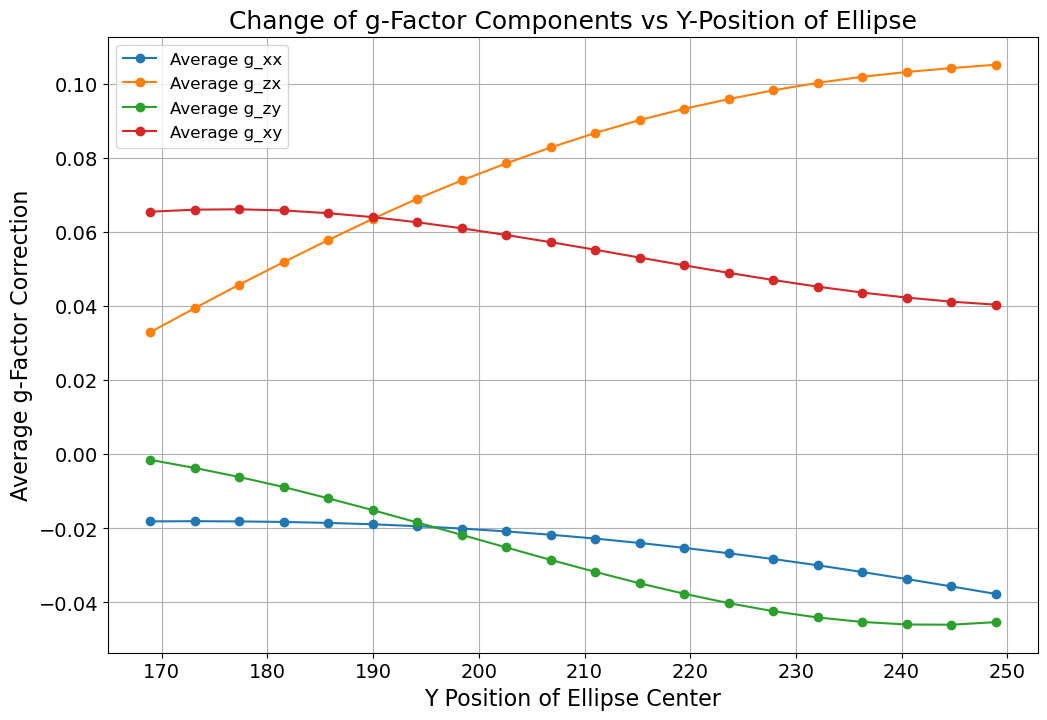

In [20]:
# Prepare the figure and axes
plt.figure(figsize=(12, 8))

# Plot each g-factor component
for name, averages in results.items():
    plt.plot(y_positions, averages, label=f'Average {name}', marker='o')  # Use marker to highlight data points

# Adding labels, title and grid
plt.title('Change of g-Factor Components vs Y-Position of Ellipse', fontsize=18)
plt.xlabel('Y Position of Ellipse Center', fontsize=16)
plt.ylabel('Average g-Factor Correction', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [21]:
def g_inplane(g_xx_mean, g_xy_mean):
    """Compute in-plane average g-factor."""
    return (1/3) * (2 * g_xx_mean + g_xy_mean)

def g_outplane(g_zx_mean, g_zy_mean):
    """Compute out-of-plane average g-factor."""
    return (g_zx_mean + g_zy_mean) / 2

# Assuming results is a dictionary with keys 'g_xx', 'g_zx', 'g_zy', 'g_xy' each containing a list of averages
# Corresponding to each y_position
in_plane_averages = []
out_plane_averages = []

for i in range(len(y_positions)):
    in_plane_avg = g_inplane(results['g_xx'][i], results['g_xy'][i])
    out_plane_avg = g_outplane(results['g_zx'][i], results['g_zy'][i])

    in_plane_averages.append(in_plane_avg)
    out_plane_averages.append(out_plane_avg)


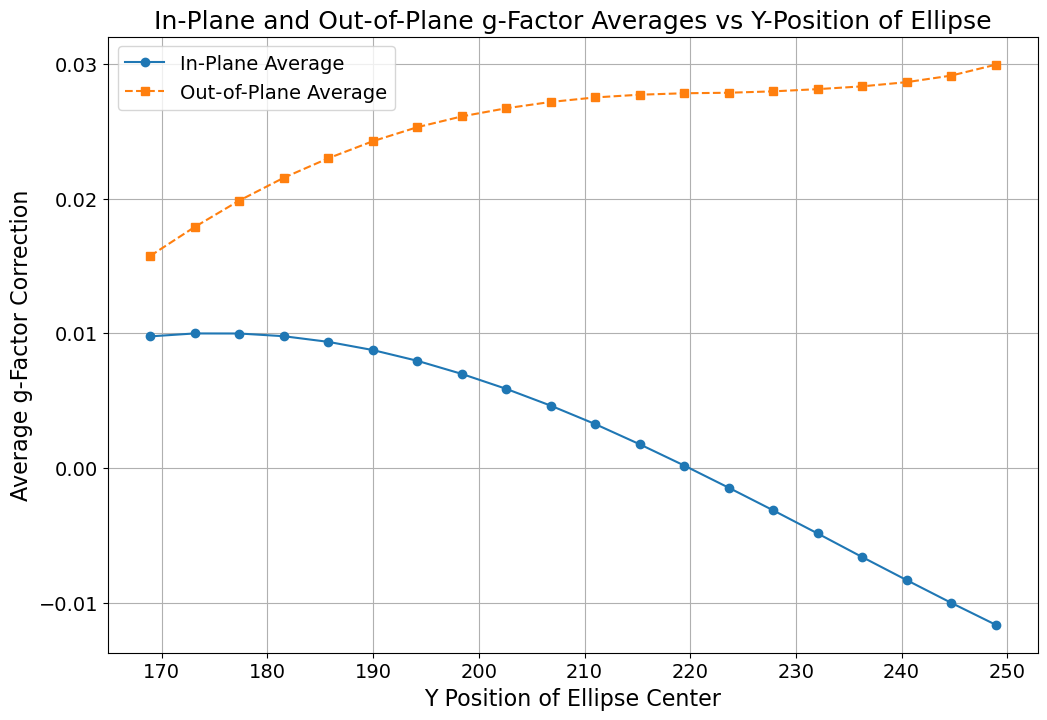

In [22]:
plt.figure(figsize=(12, 8))

# Plotting in-plane and out-of-plane averages
plt.plot(y_positions, in_plane_averages, label='In-Plane Average', marker='o', linestyle='-')
plt.plot(y_positions, out_plane_averages, label='Out-of-Plane Average', marker='s', linestyle='--')

plt.title('In-Plane and Out-of-Plane g-Factor Averages vs Y-Position of Ellipse', fontsize=18)
plt.xlabel('Y Position of Ellipse Center', fontsize=16)
plt.ylabel('Average g-Factor Correction', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

# Add a legend with specific font size and location
plt.legend(fontsize=14, loc='upper left')

# Show the plot
plt.show()
